----------------------------------

# <span style="color:blueviolet"> 👩‍💻 DATA EDA <span style ="font-family:Papyrus;"> with python </span>
----------------------------------

<span style="background-color:#F5F5F5"> **🚩 강의 개요** <br> </span> 
- python 이 어떠한 언어인지 이해합니다. 
- python 의 library 의 개념을 이해하고 실습합니다. 
- kaggle dataset 을 활용한 전반적인 EDA 를 진행합니다.
- 모든 회차에서 실습 코드를 제공합니다.
- 이론 비중 30%, 코드실습 비중 70%

<span style="background-color:#F5F5F5"> **🚩 실습 커리큘럼** <br> </span> 
- python, 라이브러리 개념학습 및 실습환경 준비 
- python 활용 테이블 결합
- python 활용 데이터 이상치, 결측치 처리 ✅
- python 활용 데이터 시각화
</span> 
  

-----------------------------------

## <span style="color:red"> 📌 chapter 1. 결측치 파헤치기

#### <span style="color:blue"> **📘 1-1. 라이브러리 import** </span>

In [1]:
import pandas as pd 
import numpy as np
import time
from PIL import Image
import warnings

# 오류 경고 무시하기
warnings.filterwarnings(action='ignore')

#### <span style="color:blue"> **📘 1-2. CSV 파일을 통한 테이블 LOAD** </span>

pandas 라이브러리를 활용한 csv 파일 읽기 

In [2]:
# pandas 라이브러리를 활용한 csv 파일 읽기 
df = pd.read_csv("product_details.csv") # product_details.csv
df2 = pd.read_csv("customer_details.csv") # customer_details.csv
df3 = pd.read_csv("E-commerece sales data 2024.csv") # E-commerece sales data 2024.csv

#### <span style="color:blue"> **📘 1-3. 결측치 제거** </span>

In [3]:
#전체 데이터셋 확인
df3

,user id,product id,Interaction type,Time stamp,Unnamed: 4
0,1.0,4c69b61db1fc16e7013b43fc926e502d,purchase,10/10/2023 8:00,NaN
1,2.0,66d49bbed043f5be260fa9f7fbff5957,view,11/10/2023 8:00,NaN
2,3.0,2c55cae269aebf53838484b0d7dd931a,like,12/10/2023 8:00,NaN
3,4.0,18018b6bc416dab347b1b7db79994afa,view,13/10/2023 8:00,NaN
4,5.0,e04b990e95bf73bbe6a3fa09785d7cd0,like,14/10/2023 8:00,NaN
...,...,...,...,...,...
3289,NaN,NaN,NaN,NaN,NaN
3290,NaN,NaN,NaN,NaN,NaN
3291,NaN,NaN,NaN,NaN,NaN
3292,NaN,NaN,NaN,NaN,NaN


In [4]:
# 결측치 제거1 - 열 제거하기 
df3 = df3.drop('Unnamed: 4', axis=1)

In [5]:
#컬럼별 결측치 확인 
df3.isnull().sum()

user id             295
product id          295
Interaction type    423
Time stamp          295
dtype: int64

In [6]:
# 결측치 제거2 -결측치가 있는 행들은 모두 제거 
df3.dropna(inplace=True)

In [7]:
df3.isnull().sum()

user id             0
product id          0
Interaction type    0
Time stamp          0
dtype: int64

#### <span style="color:blue"> **📘 1-4. 결측치 대체: 최빈값** </span>

In [8]:
# 데이터 불러오기
df3 = pd.read_csv("E-commerece sales data 2024.csv") # E-commerece sales data 2024.csv

In [9]:
# Interaction type 의 결측치: 423개 
df3.isnull().sum()

user id              295
product id           295
Interaction type     423
Time stamp           295
Unnamed: 4          3294
dtype: int64

In [10]:
# 결측치는 카운트 되지 않습니다.
df3.groupby('Interaction type').count()

,user id,product id,Time stamp,Unnamed: 4
Interaction type,,,,
like,1145,1145,1145,0
purchase,855,855,855,0
view,871,871,871,0


In [11]:
# 결측치가 있는 Interaction type 컬럼을 최빈값으로 대체하기 위해, 해당 컬럼의 최빈값을 구함
df3['Interaction type'].mode()

0    like
Name: Interaction type, dtype: object

In [12]:
# mode 는 최빈값을 의미
# df3 의 Interaction type 컬럼을 fillna함수를 이용하여 채워주되, mode() 함수를 사용하여 최빈값으로 넣어줌
# mode 함수는 시리즈를 output으로 가집니다. 
# 따라서,[0]을 통해 시리즈 중 단일값을 가져와야 합니다. 
df3 = df3['Interaction type'].fillna(df3['Interaction type'].mode()[0])

In [13]:
# 연산 후 인덱스 재설정
df3= df3.reset_index()

In [14]:
# 최빈값으로 대체된 데이터프레임 확인 
df3.groupby('Interaction type').count()

,index
Interaction type,
like,1568
purchase,855
view,871


In [15]:
# 최빈값 대체 완료
1568-1145

423

#### <span style="color:blue"> **📘 1-5. 결측치 대체: 평균, 중앙값** </span>

In [16]:
# 데이터 불러오기
df = pd.read_csv("product_details.csv") # product_details.csv

# Shipping Weight 의 경우, 1138 개의 결측치가 있습니다. 
# 13번째 인덱스, int 타입입니다.
df.isnull().sum()[13],df.isnull().sum()[13].dtype

(1138, dtype('int64'))

In [17]:
# str.split 을 통해 문자열을 분리하고, 그 값 중 첫번째 인덱스를 가져옴
# df['sw'] = dd['Shipping Weight'].str.split().str[1]과 비교해보세요! 
df['sw'] = df['Shipping Weight'].str.split().str[0]

# string to float, 에러무시  
df['sw'] = pd.to_numeric(df['sw'] , errors='coerce')

# 평균값 대체
# inplace=True 로 하면 원본 데이터가 바뀌게 됩니다.
df['sw'] = df['sw'].fillna(df['sw'].mean())
df.isnull().sum()

# 중간값 대체
# inplace=True 로 하면 원본 데이터가 바뀌게 됩니다.
df['sw'] = df['sw'].fillna(df['sw'].median())
df.isnull().sum()

# 바로 위 값으로 대체
df['sw'] = df['sw'].fillna(method='ffill')
df.isnull().sum()

# 바로 아래 값으로 대체
df['sw'] = df['sw'].fillna(method='bfill')
#df.isnull().sum()

#### <span style="color:blue"> **📘 1-6. 결측치 대체: group by** </span>

In [18]:
# 데이터 불러오기
df = pd.read_csv("product_details.csv") # product_details.csv
df['sw'] = df['Shipping Weight'].str.split().str[0]

# string to float, 에러무시  
df['sw'] = pd.to_numeric(df['sw'] , errors='coerce')

# group by 값으로 채워넣기 - 사전 데이터 확인
df.groupby('Is Amazon Seller')['sw'].median()

Is Amazon Seller
N    2.45
Y    3.40
Name: sw, dtype: float64

In [19]:
#group by한 데이터를 데이터프레임의 컬럼으로 추가하기 위해 
#transform 함수 사용
df['sw'] = df['sw'].fillna(df.groupby('Is Amazon Seller')['sw'].transform('median'))
df.isnull().sum()

Uniqe Id                     0
Product Name                 0
Brand Name               10002
Asin                     10002
Category                   830
Upc Ean Code              9968
List Price               10002
Selling Price              107
Quantity                 10002
Model Number              1770
About Product              273
Product Specification     1632
Technical Details          790
Shipping Weight           1138
Product Dimensions        9523
Image                        0
Variants                  7524
Sku                      10002
Product Url                  0
Stock                    10002
Product Details          10002
Dimensions               10002
Color                    10002
Ingredients              10002
Direction To Use         10002
Is Amazon Seller             0
Size Quantity Variant    10002
Product Description      10002
sw                           0
dtype: int64

In [20]:
df['sw'].mode()

0    3.4
Name: sw, dtype: float64

In [21]:
df.groupby(['sw'])['Uniqe Id'].count().sort_values(ascending=False).reset_index()

,sw,Uniqe Id
0,3.40,1125
1,1.00,409
2,1.60,282
3,0.32,271
4,4.00,239
...,...,...
747,12.65,1
748,12.45,1
749,12.25,1
750,12.10,1


## <span style="color:red"> 📌 chapter 2. 이상치 파헤치기

#### <span style="color:red"> **📘 2-1. 이상치 탐지: Z-SCORE** </span>

In [22]:
# df 의 Shipping Weight를 기준으로 다양한 이상치 감지 기법을 적용해 보겠습니다. 
df = pd.read_csv("product_details.csv") # product_details.csv

In [23]:
# string -> float -> int 
df['sw'] = df['Shipping Weight'].str.split().str[0]
df['sw'] = pd.to_numeric(df['sw'] , errors='coerce').fillna(0)

In [24]:
# z-score 를 적용할 컬럼 선정
df1 = df[['sw']]

In [25]:
df1

,sw
0,10.70
1,4.00
2,12.80
3,13.40
4,13.40
...,...
9997,4.80
9998,0.96
9999,2.80
10000,6.10


In [26]:
from sklearn.preprocessing import StandardScaler
# 표준화 진행
# 표준화 :  평균을 0으로, 표준 편차를 1로 
# 데이터를 0을 중심으로 양쪽으로 데이터를 분포시키는 방법
# 표준화를 하게 되면 각 데이터들은 평균을 기준으로 얼마나 떨여져 있는지를 나타내는 값으로 변환
scale_df = StandardScaler().fit_transform(df1)

In [27]:
scale_df

array([[ 0.13758775],
       [-0.0951741 ],
       [ 0.21054296],
       ...,
       [-0.13686279],
       [-0.02221889],
       [ 0.47804538]])

In [28]:
# array 형태로 반환된 것을 dataframe 으로 받아줍니다.
scale_df = pd.DataFrame(scale_df)

In [29]:
# 기존 raw 값과 표준화 이후 데이터를 비교하기 위해 merge 진행
merge_df = pd.concat([df1, scale_df],axis=1)

In [30]:
# 표준화 된 데이터를 확인할 할 수 있게 되었습니다. 
merge_df

,sw,0
0,10.70,0.137588
1,4.00,-0.095174
2,12.80,0.210543
3,13.40,0.231387
4,13.40,0.231387
...,...,...
9997,4.80,-0.067382
9998,0.96,-0.200785
9999,2.80,-0.136863
10000,6.10,-0.022219


In [31]:
merge_df.columns = ['Shipping Weight', 'zscore']

In [32]:
# 이상치 감지 
# Z-SCORE 기반, -3 보다 작거나 3보다 큰 경우를 이상치로 판별 
mask = ((merge_df['zscore']<-3) | (merge_df['zscore']>3))

In [33]:
# mask 메소드 사용
strange_df = merge_df[mask]

In [34]:
strange_df

,Shipping Weight,zscore
237,473.0,16.198155
296,385.0,13.140985
610,103.0,3.344143
839,874.0,30.129126
916,500.0,17.136151
934,378.0,12.897801
1833,285.0,9.666927
2463,241.0,8.138342
3121,396.0,13.523131
3266,95.0,3.066218


In [35]:
# 총 55 건 탐지 
strange_df.count()

Shipping Weight    55
zscore             55
dtype: int64

#### <span style="color:red"> **📘 2-2. 이상치 탐지: IQR** </span>

In [36]:
# df 의 Shipping Weight를 기준으로 다양한 이상치 감지 기법을 적용해 보겠습니다. 
df = pd.read_csv("product_details.csv") # product_details.csv

# string -> float -> int 
df['sw'] = df['Shipping Weight'].str.split().str[0]
df['sw'] = pd.to_numeric(df['sw'] , errors='coerce').fillna(0).astype(int)

In [37]:
# 이상치를 감지할 컬럼 선정
df1 = df[['sw']]

In [38]:
# Q3, Q1, IQR 값 구하기
# 백분위수를 구해주는 quantile 함수를 적용하여 쉽게 구할 수 있음
# 데이터프레임 전체 혹은 특정 열에 대하여 모두 적용이 가능

q3 = df1['sw'].quantile(0.75) 
q1 = df1['sw'].quantile(0.25)

iqr = q3 - q1
q3, q1, iqr

(7.0, 1.0, 6.0)

In [39]:
# 이상치 판별 및 dataframe 저장 
# Q3 : 100개의 데이터로 가정 시, 25번째로 높은 값에 해당합니다.
# Q1 : 100개의 데이터로 가정 시, 75번째로 높은 값에 해당합니다.
# IQR : Q3 - Q1의 차이를 의미합니다.
# 이상치 : Q3 + 1.5 * IQR보다 높거나 Q1 - 1.5 * IQR보다 낮은 값을 의미

def is_outlier(df1):
    score = df1['sw']
    if score > 7 + (1.5 * 6) or score < 1 - (1.5 * 6):
        return '이상치'
    else:
        return '이상치아님'

# apply 함수를 통하여 각 값의 이상치 여부를 찾고 새로운 열에 결과 저장
df1['이상치여부'] = df1.apply(is_outlier, axis = 1) # axis = 1 지정 필수

df1

,sw,이상치여부
0,10,이상치아님
1,4,이상치아님
2,12,이상치아님
3,13,이상치아님
4,13,이상치아님
...,...,...
9997,4,이상치아님
9998,0,이상치아님
9999,2,이상치아님
10000,6,이상치아님


In [40]:
# IQR 방식으로 구한 이상치 개수는 349 개 
df1.groupby('이상치여부').count()

,sw
이상치여부,
이상치,349
이상치아님,9653


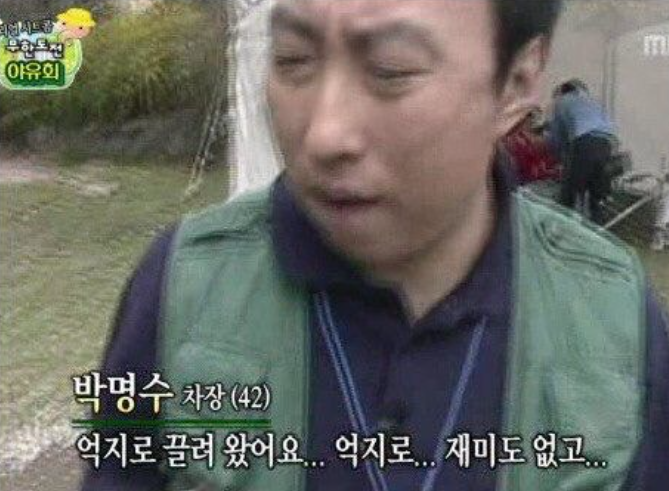

In [41]:
Image.open('야유회명수.png')